In [6]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import datetime as dt
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14) 
mpl.rc('legend', fontsize=16) 
mpl.rc('axes', titlesize=16) 
mpl.rc('figure', titlesize=16) 
mpl.rc('axes', labelsize=16) 
mpl.rc('font', size=16) 
mpl.rc('legend', numpoints= 1)
mpl.rc('lines', markersize= 8)
%matplotlib inline

## Light Response

In [2]:
def soglight(I,Iopt,mumax):
    return mumax*(1-np.exp(-1*I/(.33*Iopt)))*np.exp(-1*I/(30*Iopt))*1.06

In [3]:
def plattLight(I,alpha,mumax,beta):
    a=alpha*I/mumax
    b=beta*I/mumax
    return mumax*(1-np.exp(-1*a))*(np.exp(-1*b))

In [4]:
I=np.arange(0,700)
mumax={'d':5.5e-5,'f':1.95e-5}
Iopt={'d':42,'f':10}
mumaxP={'d':1.06*mumax['d'],'f':1.06*mumax['f']}
alpha={'d':mumaxP['d']/(.33*Iopt['d']),'f':mumaxP['f']/(.33*Iopt['f'])}
beta={'d':mumaxP['d']/(30*Iopt['d']),'f':mumaxP['f']/(30*Iopt['f'])}

In [5]:
mumaxP,alpha,beta

({'d': 5.830000000000001e-05, 'f': 2.067e-05},
 {'d': 4.206349206349206e-06, 'f': 6.2636363636363635e-06},
 {'d': 4.6269841269841274e-08, 'f': 6.89e-08})

Text(0.5, 1.0, 'Light-dependent growth')

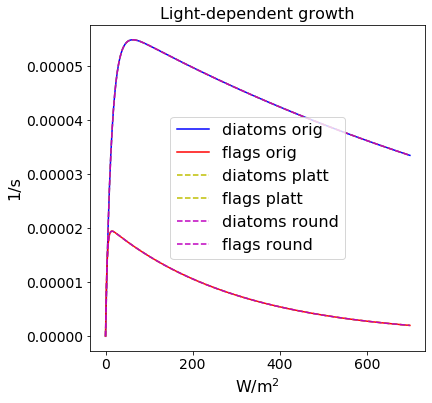

In [6]:
fig,ax=plt.subplots(1,1,figsize=(6,6))
s='d'
ax.plot(I,soglight(I,Iopt[s],mumax[s]),'b-',label='diatoms orig')
s='f'
ax.plot(I,soglight(I,Iopt[s],mumax[s]),'r-',label='flags orig')
s='d'
ax.plot(I,plattLight(I,alpha[s],mumaxP[s],beta[s]),'y--',label='diatoms platt')
s='f'
ax.plot(I,plattLight(I,alpha[s],mumaxP[s],beta[s]),'y--',label='flags platt')

ax.plot(I,plattLight(I,4.206e-6,5.83e-5,4.627e-8),'m--',label='diatoms round')
ax.plot(I,plattLight(I,6.264e-6,2.067e-5,6.89e-8),'m--',label='flags round')
ax.legend()
ax.set_xlabel('W/m$^2$')
ax.set_ylabel('1/s')
ax.set_title('Light-dependent growth')

In [7]:
s='d'
Pmax_Ps=alpha[s]/(alpha[s]+beta[s])*(beta[s]/(alpha[s]+beta[s]))**(beta[s]/alpha[s])
Pmax_Ps,Pmax_Ps**(-1)

(0.9411349490285419, 1.0625468760162609)

In [8]:
s='f'
Pmax_Ps=alpha[s]/(alpha[s]+beta[s])*(beta[s]/(alpha[s]+beta[s]))**(beta[s]/alpha[s])
Pmax_Ps,Pmax_Ps**(-1)

(0.9411349490285418, 1.0625468760162609)

In [9]:
I=np.arange(0,700)
mumax={'d':5.5e-5,'f':1.95e-5}
Iopt={'d':42,'f':10}
mumaxP={'d':1.06*mumax['d'],'f':1.06*mumax['f']}
alpha={'d':mumaxP['d']/(.33*Iopt['d']),'f':mumaxP['f']/(.33*Iopt['f'])}
beta={'d':mumaxP['d']/(30*Iopt['d']),'f':mumaxP['f']/(30*Iopt['f'])}

In [10]:
mumaxP,alpha,beta

({'d': 5.830000000000001e-05, 'f': 2.067e-05},
 {'d': 4.206349206349206e-06, 'f': 6.2636363636363635e-06},
 {'d': 4.6269841269841274e-08, 'f': 6.89e-08})

In [21]:
def newlight(mumax,a,Imax,I):
    #a=alpha/mumax
    alpha=a*mumax
    beta=alpha/(np.exp(Imax*alpha/mumax)-1)
    b=beta/mumax
    f=1.06#(alpha+beta)/alpha*((alpha+beta)/beta)**(beta/alpha)
    mu=mumax*(1-np.exp(-a*I))*(np.exp(-b*I))*f
    return mu

In [13]:

alpha2={'d':mumax['d']/(.33*Iopt['d']),'f':mumax['f']/(.33*Iopt['f'])}
beta2={'d':mumax['d']/(30*Iopt['d']),'f':mumax['f']/(30*Iopt['f'])}
Iopt2={'d':mumax['d']/alpha2['d']*np.log((alpha2['d']+beta2['d'])/beta2['d']),
       'f':mumax['f']/alpha2['f']*np.log((alpha2['f']+beta2['f'])/beta2['f'])}
a2={'d':alpha2['d']/mumax['d'],'f':alpha2['f']/mumax['f']}
a2

{'d': 0.07215007215007214, 'f': 0.303030303030303}

In [16]:
Iopt

{'d': 42, 'f': 10}

In [14]:
Iopt2

{'d': 62.658287254638324, 'f': 14.918639822532935}

In [17]:
mumax

{'d': 5.5e-05, 'f': 1.95e-05}

In [20]:
for s in ('d','f'):
    alpha=a2[s]*mumax[s]
    beta=alpha/(np.exp(Iopt2[s]*alpha/mumax[s])-1)
    b=beta/mumax[s]
    f=(alpha+beta)/alpha*((alpha+beta)/beta)**(beta/alpha)
    print('alpha',s,alpha)
    print('b',s,b)
    print('f',s,f)

alpha d 3.968253968253968e-06
b d 0.0007936507936507937
f d 1.062546876016261
alpha f 5.909090909090908e-06
b f 0.0033333333333333353
f f 1.062546876016261


In [37]:
def newfromold(Iopt,mumax):
    munew=mumax*1.06/1.062546876016261
    a=1/(.33*Iopt)
    alpha=a*munew
    beta=1/(30*Iopt)*munew
    Ioptnew=munew/alpha*np.log((alpha+beta)/beta)
    return {'Ioptnew':Ioptnew, 'munew':munew, 'a':a, 'alpha':alpha, 'beta': beta}

In [40]:
newfromold(42.000,0.600E-04)

{'Ioptnew': 62.658287254638324,
 'munew': 5.985618275821525e-05,
 'a': 0.07215007215007214,
 'alpha': 4.318627904633134e-06,
 'beta': 4.750490695096448e-08}

In [41]:
newfromold(37.000,0.250E-04)

{'Ioptnew': 55.198967343371855,
 'munew': 2.4940076149256356e-05,
 'a': 0.0819000819000819,
 'alpha': 2.0425942792183747e-06,
 'beta': 2.2468537071402123e-08}

In [42]:
newfromold(10,0.250E-04)

{'Ioptnew': 14.918639822532937,
 'munew': 2.4940076149256356e-05,
 'a': 0.303030303030303,
 'alpha': 7.5575988331079854e-06,
 'beta': 8.313358716418785e-08}

In [43]:
newfromold(42.000,5.5E-05)

{'Ioptnew': 62.658287254638324,
 'munew': 5.486816752836398e-05,
 'a': 0.07215007215007214,
 'alpha': 3.958742245913707e-06,
 'beta': 4.354616470505078e-08}

In [44]:
newfromold(10.000,1.95E-05)

{'Ioptnew': 14.918639822532935,
 'munew': 1.9453259396419954e-05,
 'a': 0.303030303030303,
 'alpha': 5.894927089824228e-06,
 'beta': 6.484419798806652e-08}

In [45]:
newfromold(42.000,6.11E-05)

{'Ioptnew': 62.65828725463832,
 'munew': 6.095354610878252e-05,
 'a': 0.07215007215007214,
 'alpha': 4.3978027495514085e-06,
 'beta': 4.837583024506549e-08}

In [46]:
newfromold(37.000,2.22E-05)

{'Ioptnew': 55.198967343371855,
 'munew': 2.214678762053964e-05,
 'a': 0.0819000819000819,
 'alpha': 1.8138237199459165e-06,
 'beta': 1.995206091940508e-08}

In [47]:
newfromold(10.000,2.11E-05)

{'Ioptnew': 14.918639822532935,
 'munew': 2.1049424269972363e-05,
 'a': 0.303030303030303,
 'alpha': 6.3786134151431395e-06,
 'beta': 7.016474756657454e-08}

In [48]:
newfromold(45.000,6.0495E-05)

{'Ioptnew': 67.1338792013982,
 'munew': 6.0349996265970526e-05,
 'a': 0.06734006734006734,
 'alpha': 4.063972812523268e-06,
 'beta': 4.4703700937755944e-08}

In [49]:
newfromold(37.000, 2.22E-05)

{'Ioptnew': 55.198967343371855,
 'munew': 2.214678762053964e-05,
 'a': 0.0819000819000819,
 'alpha': 1.8138237199459165e-06,
 'beta': 1.995206091940508e-08}

In [50]:
newfromold(10.000,2.109E-05)

{'Ioptnew': 14.918639822532935,
 'munew': 2.103944823951266e-05,
 'a': 0.303030303030303,
 'alpha': 6.375590375609896e-06,
 'beta': 7.013149413170887e-08}

In [19]:
for s in ('d','f'):
    print(a2[s]*mumax[s])

3.968253968253968e-06
5.909090909090908e-06


Text(0.5, 1.0, 'Light-dependent growth')

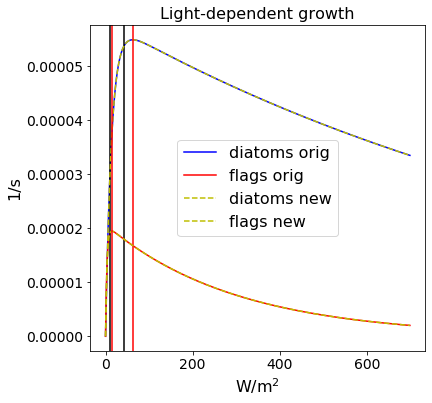

In [22]:
fig,ax=plt.subplots(1,1,figsize=(6,6))
s='d'
ax.plot(I,soglight(I,Iopt[s],mumax[s]),'b-',label='diatoms orig')
ax.axvline(Iopt[s],color='k')
s='f'
ax.plot(I,soglight(I,Iopt[s],mumax[s]),'r-',label='flags orig')
ax.axvline(Iopt[s],color='k')
s='d'
ax.plot(I,newlight(mumax[s],a2[s],Iopt2[s],I),'y--',label='diatoms new')
ax.axvline(Iopt2[s],color='r')
s='f'
ax.plot(I,newlight(mumax[s],a2[s],Iopt2[s],I),'y--',label='flags new')
ax.axvline(Iopt2[s],color='r')

ax.legend()
ax.set_xlabel('W/m$^2$')
ax.set_ylabel('1/s')
ax.set_title('Light-dependent growth')

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(6,6))
s='d'
ax.plot(I,soglight(I,Iopt[s],mumax[s]),'b-',label='diatoms orig')
ax.axvline(Iopt[s],color='k')
s='f'
ax.plot(I,soglight(I,Iopt[s],mumax[s]),'r-',label='flags orig')
ax.axvline(Iopt[s],color='k')
s='d'
ax.plot(I,newlight(mumax[s],a2[s],Iopt2[s],I),'y--',label='diatoms new')
ax.axvline(Iopt2[s],color='r')
s='f'
ax.plot(I,newlight(mumax[s],a2[s],Iopt2[s],I),'y--',label='flags new')
ax.axvline(Iopt2[s],color='r')

ax.legend()
ax.set_xlabel('W/m$^2$')
ax.set_ylabel('1/s')
ax.set_title('Light-dependent growth')
ax.set_xlim(0,25)

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(6,6))
for imumax in np.linspace(1e-5,1e-4,5):
    for ia in (.07,.1,.2,.4):
        for iIopt in np.linspace(5,150,5):
            ax.plot(I,newlight(imumax,ia,iIopt,I)/imumax)

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(18,6))
for imumax in np.linspace(1e-5,1e-4,5):
    ax[0].plot(I,newlight(imumax,alpha2['d'],Iopt2['d'],I)/imumax)
for ia in (.03,.07,.1,.13,.2):
    ax[1].plot(I,newlight(mumax['d'],ia,Iopt2['d'],I)/mumax['d'])
    print(ia*mumax['d']/(np.exp(Iopt2['d']*ia)-1))
for iIopt in np.linspace(5,150,5):
    ax[2].plot(I,newlight(mumax['d'],alpha['d'],iIopt,I)/mumax['d'])

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(18,6))
for imumax in np.linspace(1e-5,1e-4,5):
    ax[0].plot(I,newlight(imumax,alpha2['d'],Iopt2['d'],I))
for ia in (.03,.07,.1,.13,.2):
    ax[1].plot(I,newlight(mumax['d'],ia,Iopt2['d'],I))
    print(ia*mumax['d']/(np.exp(Iopt2['d']*ia)-1))
for iIopt in np.linspace(5,150,5):
    ax[2].plot(I,newlight(mumax['d'],alpha['d'],iIopt,I))

In [1]:
#5_4:

In [ ]:
  zz_rate_R_diat            = 0.600E-04    !: 1/s
   zz_rate_R_myri            = 0.250E-04    !: 1/s
   zz_rate_R_nano            = 0.250E-04    !: 1/s

zz_Ia_diat=0.07215007215007214_wp
      zz_Ia_nano=0.303030303030303_wp
      zz_Ib_diat=0.0007936507936507937_wp
      zz_Ib_nano=0.0033333333333333353_wp
      zz_If_diat=1.06_wp
      zz_If_nano=1.06_wp
                          zz_plank_growth_light(ji,jj,jk) = &
                       & (1.0_wp - exp(-zz_Ia*zz_I_par(ji,jj,jk) )) * &
                       & exp(-zz_Ib*zz_I_par(ji,jj,jk)) * zz_If


In [7]:
def testnew(R,a,b,f,Ipar):
    growth= R*(1-np.exp(-a*Ipar )) * np.exp(-b*Ipar) * f
    return growth

In [17]:
def testold(R,Iopt,Ipar):
    growth=R*(1- np.exp(-Ipar / (0.33 * Iopt)) ) *(np.exp(-Ipar / (30 * Iopt))) * 1.06
    return growth

In [9]:
I=np.arange(0,700)

0.0007936507936507937

In [ ]:
#old:
  zz_rate_R_diat            = 0.600E-04    !: 1/s
   zz_rate_R_myri            = 0.250E-04    !: 1/s
   zz_rate_R_nano            = 0.250E-04    !: 1/s

-   zz_rate_Iopt_diat         = 42.000       !: W/m^2
-   zz_rate_Iopt_myri         = 37.000       !: W/m^2
-   zz_rate_Iopt_nano         = 10.000       !: W/m^2
                  !      (1.0_wp - exp(-zz_I_par(ji,jj,jk) / (0.33_wp * zz_rate_Iopt)) ) * &
                  !      (exp(-zz_I_par(ji,jj,jk) / (30._wp * zz_rate_Iopt))) * 1.06_wpq

In [24]:
gdiat_0=testold(0.600E-04,42.000,I)
gflag_0=testold(0.250E-04,10,I)

In [25]:
gdiat_1=testnew(0.600E-04,0.07215007215007214,0.0007936507936507937,1.06,I)
gflag_1=testnew(0.250E-04,0.303030303030303,0.0033333333333333353,1.06,I)

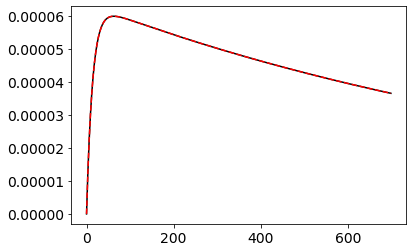

In [20]:
plt.plot(I,gdiat_0,'k-')
plt.plot(I,gdiat_1,'r--')

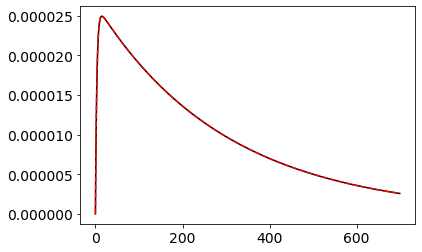

In [26]:
plt.plot(I,gflag_0,'k-')
plt.plot(I,gflag_1,'r--')

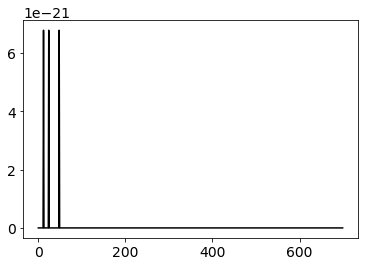

In [21]:
plt.plot(I,gdiat_1-gdiat_0,'k-')

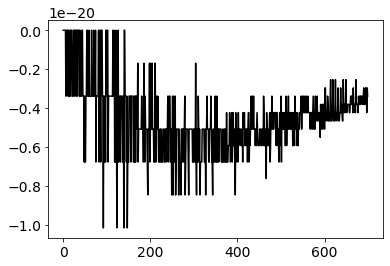

In [27]:
plt.plot(I,gflag_1-gflag_0,'k-')

In [28]:
1e-19*24*3600

8.64e-15